#                                          Problem Statement
##                                        **Customer Churn Classification  Problem**



Churn prediction is predicting which customers are at high risk of leaving your company or canceling a subscription to a service, based on their behavior with your product.It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.

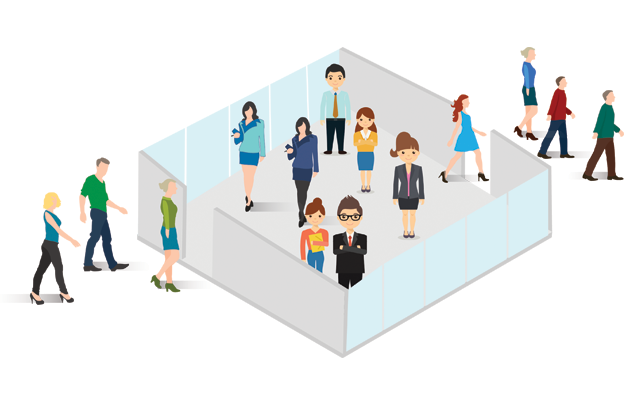

In [166]:
#import all the important libraries used for Data processing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import probplot

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

#import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#importing important metrices for performance of model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

In [167]:
#downloading all the required dataset from kaggle 

df = pd.read_csv('Telco-Customer-Churn.csv')
print('The shape of the Customer Churn dataframe is :', df.shape)


The shape of the Customer Churn dataframe is : (7043, 21)


In [168]:
#check for the first five rows of the above dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [169]:
#check for the first five rows of the above dataframe
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [170]:
#check for any duplicate in the given dataframe
df[df.duplicated()]
#No duplicate value present in the given dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [171]:
#dropping the customerID column since its non informative and there is no particular trend in the customerID feature
df.drop(columns=['customerID'],inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
#Check for the info of the given Dataframe (datatype of features in datafrane)
print('*'*125)
df.info()
print('*'*125)

*****************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract  

In [173]:
#converting TotalCharges feature to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [174]:
#check for missing values in dataset
print('*'*125)
df.isnull().mean()*100
##0.15 % Nan values present in the TotalCharges feature of DataFrame

*****************************************************************************************************************************


gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [175]:
#function to get value_counts corresponding to unique categories
def unique_categories(data):
    for col in data:
        if (data[col].dtype == 'object'):
            print(col,'\n-------')
            print(data[col].value_counts(dropna=True))
            print('='*100)
            print('='*100)
            
unique_categories(df)              

gender 
-------
Male      3555
Female    3488
Name: gender, dtype: int64
Partner 
-------
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents 
-------
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService 
-------
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines 
-------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService 
-------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity 
-------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup 
-------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DeviceProtection 
-------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
TechSupport 
-------
N

In [176]:
#We have three categories in MultipleLines. Since 'No' and 'No internet service' have the same intention so converting both
#of them to single categories 'No'
##Same is being done for 'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' Categories 'No' and 'No internet service'

#category deduction in MultipleLines feature
df['MultipleLines'] = df.MultipleLines.apply(lambda x : 'No' if x == 'No phone service' else x)

#category deduction in 'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV' and 'StreamingMovies' feature
def categories_reduction(data):
    for col in data:
        if col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
                df[col] = df[col].apply(lambda x : 'No' if x == 'No internet service' else x)
                        
categories_reduction(df)
            


In [177]:
#check again for the various categories available in the given dataframe
def unique_categories(data):
    for col in data:
        if (data[col].dtype == 'object'):
            print(col,'\n-------')
            print(data[col].value_counts(dropna=True))
            print('='*100)
            print('='*100)
            
unique_categories(df)   

gender 
-------
Male      3555
Female    3488
Name: gender, dtype: int64
Partner 
-------
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents 
-------
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService 
-------
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines 
-------
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
InternetService 
-------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity 
-------
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
OnlineBackup 
-------
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
DeviceProtection 
-------
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
TechSupport 
-------
No     4999
Yes    2044
Name: TechSupport, dtype: int64
StreamingTV 
-------
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
StreamingMovies 
-------
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
Contract 
----

# Exploartory Data Analysis

### Univariate Analysis

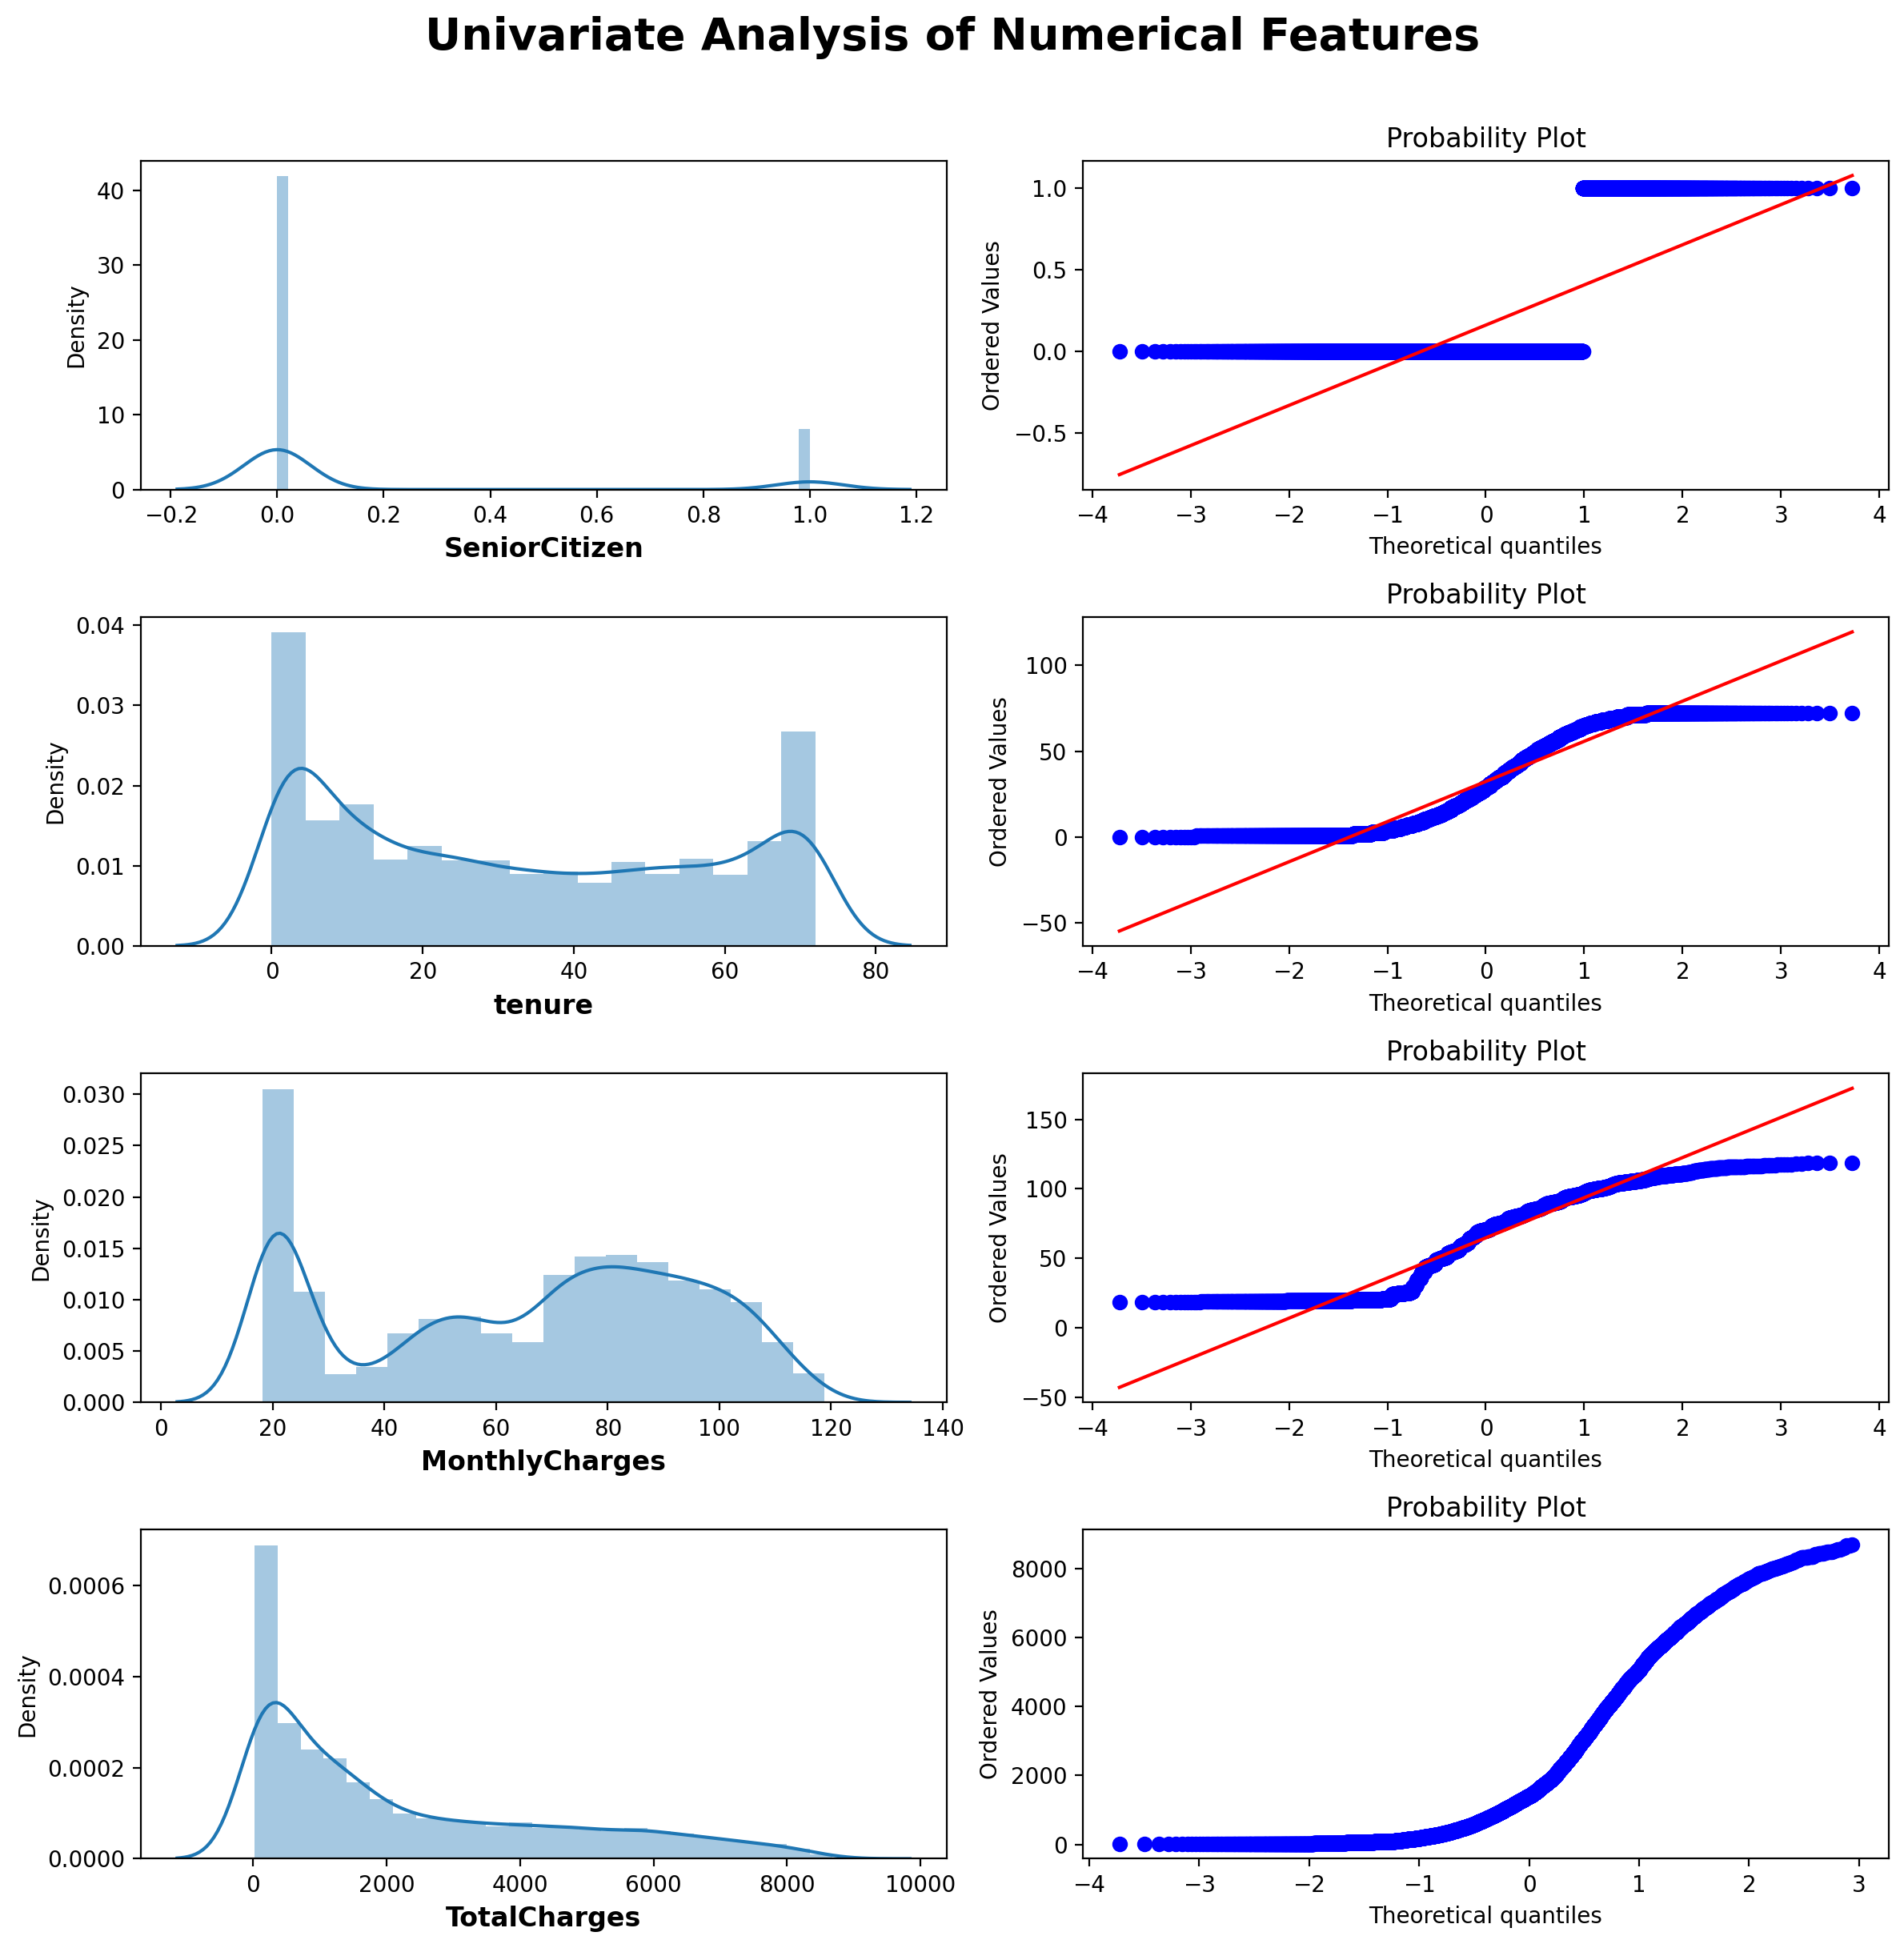

In [178]:
#QQ Plot and Distplot for checking out the skewness of numerical columns-
def univarite_distplot_numerical(df):
    plt.figure(figsize=(12,12),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20, fontweight='bold',alpha=1, y=1.01)
    
    i=0
    for col in df:
        if df[col].dtype != 'object':
            plt.subplot(4,2,i+1)
            sns.distplot(x =df[col])
            plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
            
            plt.subplot(4,2,i+2)
            stats.probplot(df[col],dist='norm',plot=plt)            
            
            plt.tight_layout()
            i+=2
            
univarite_distplot_numerical(df)

#None of the numerical columns where uniformaly distributed

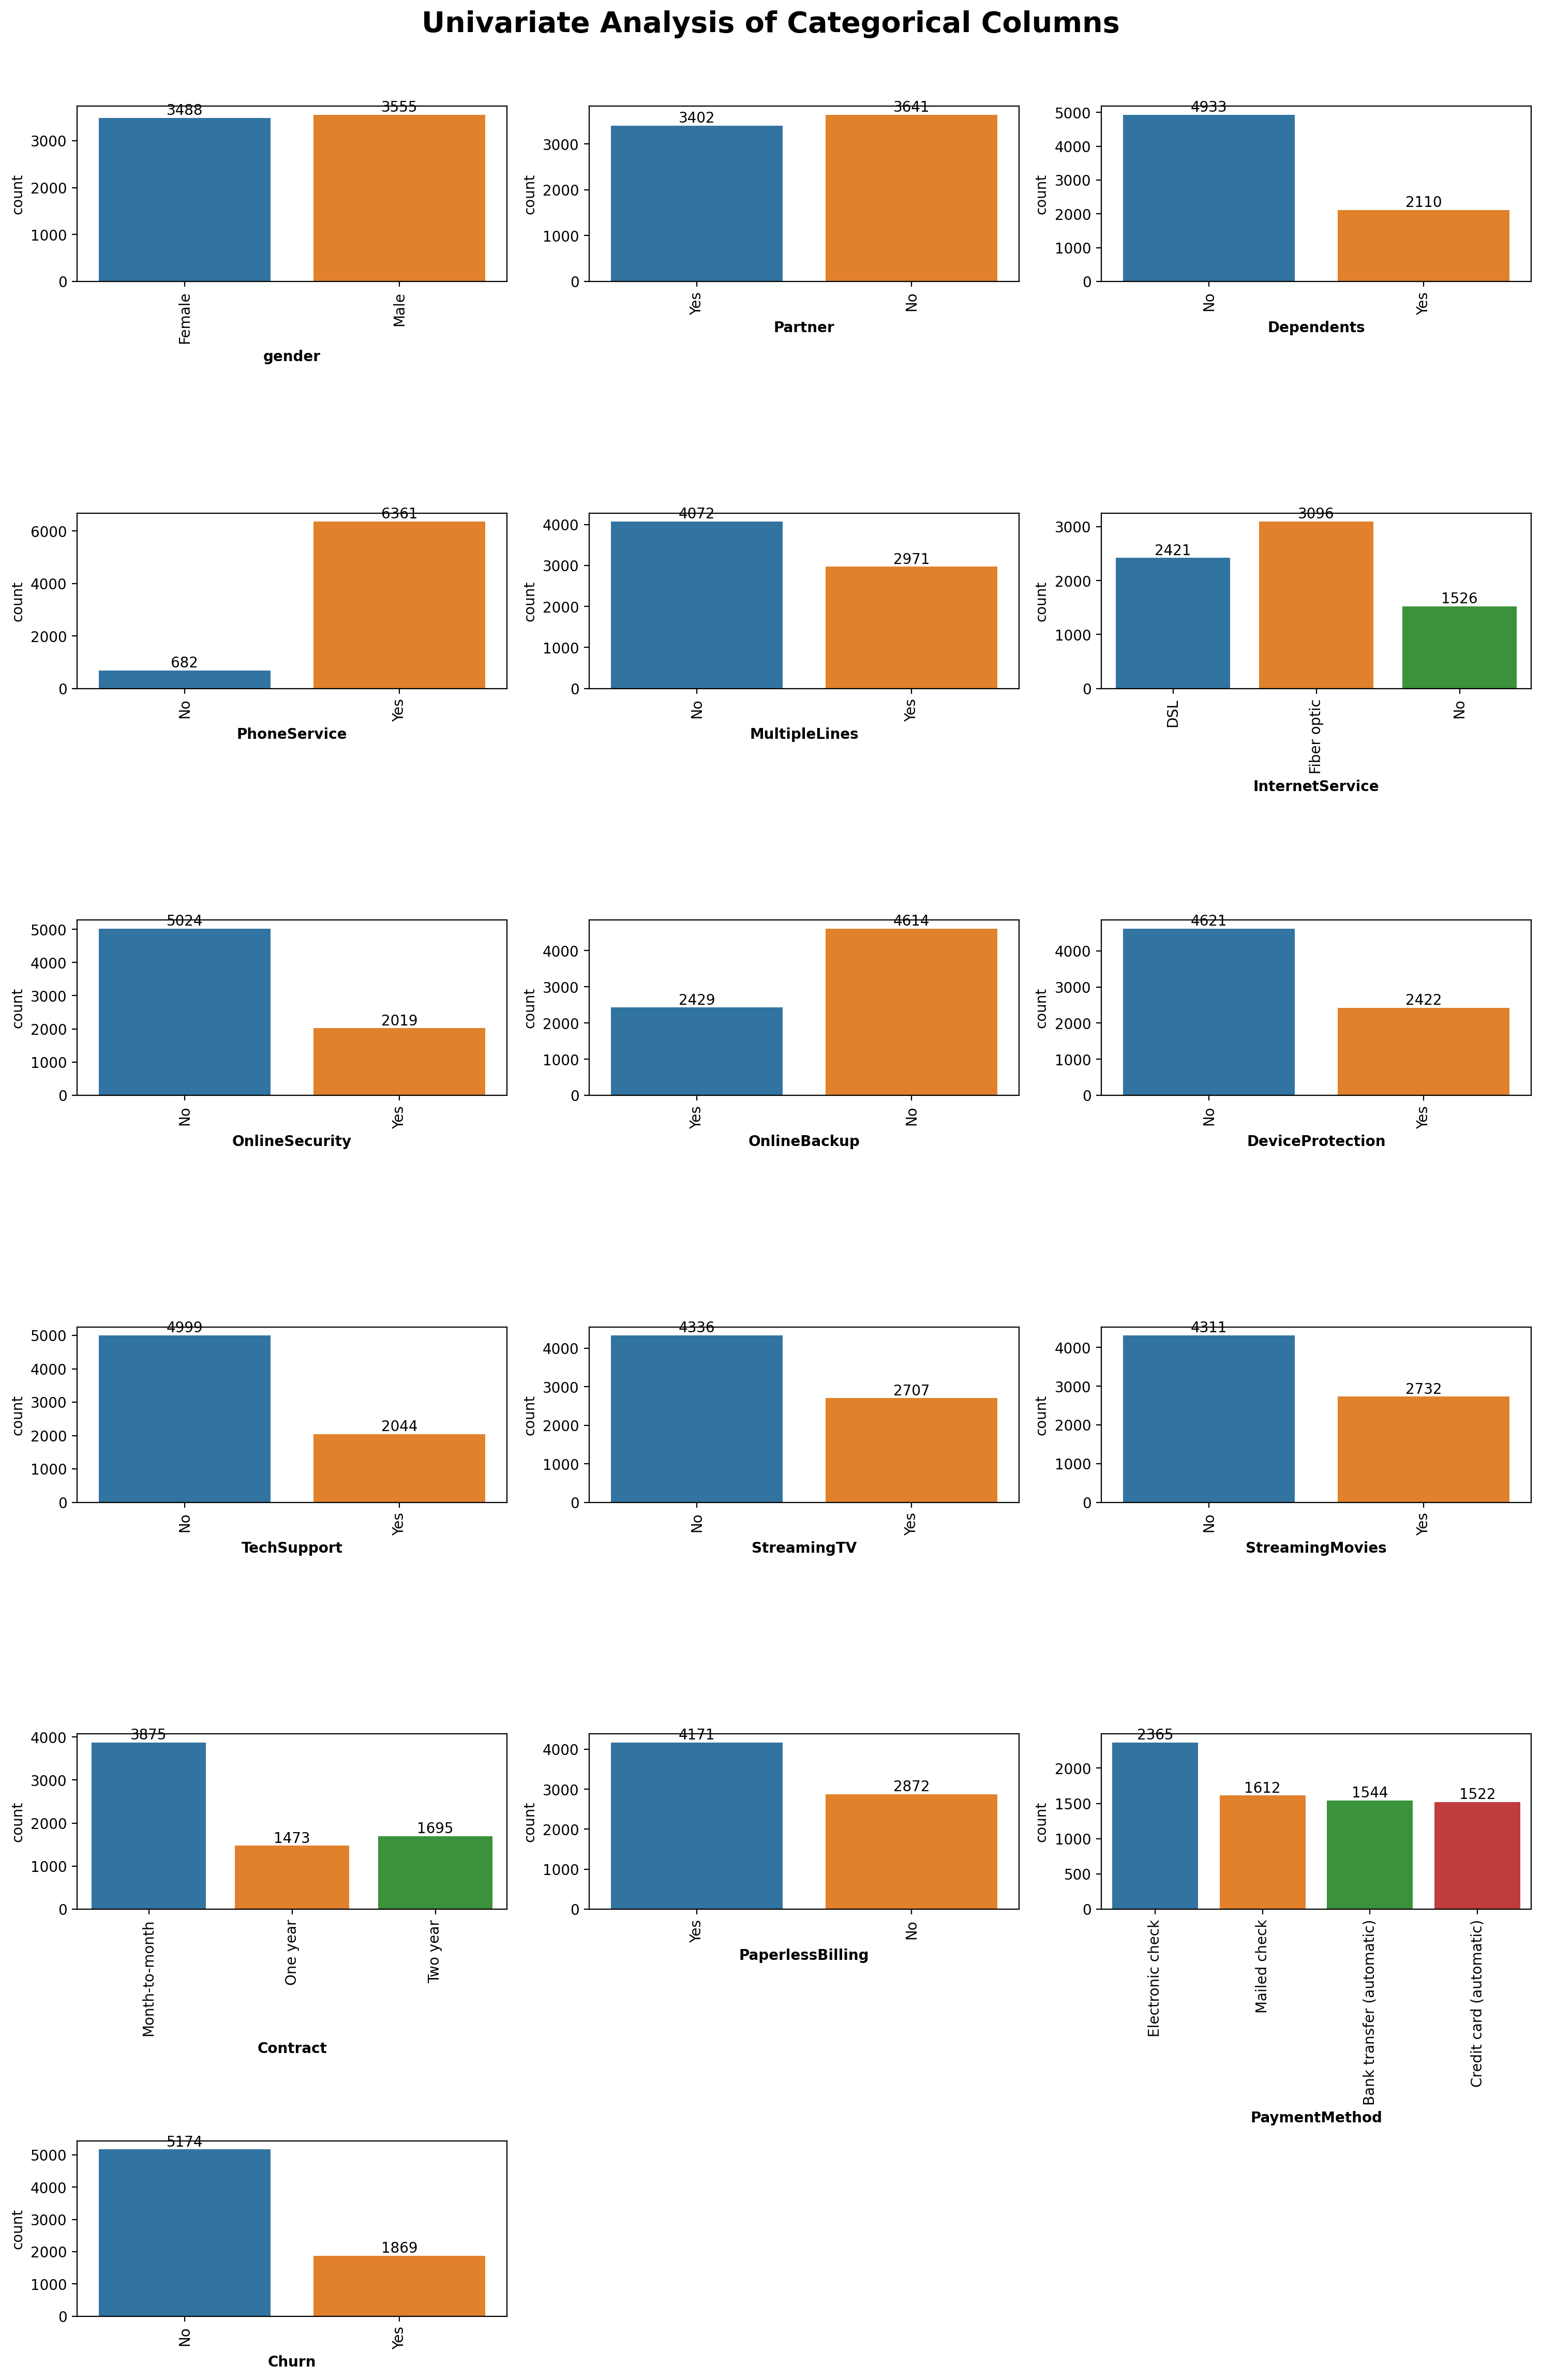

In [179]:
#Plotting countplot of categorical features:

def univariate_plots_categorical(data):
    plt.figure(figsize=(15,30),dpi=200)
    plt.suptitle('Univariate Analysis of Categorical Columns',fontsize=20,fontweight='bold',alpha=1,y=1.01)
    
    i=0
    for col in data:
        if df[col].dtype == 'object' and col not in 'TotalCharges':
            plt.subplot(8,3,i+1)
            ax =sns.countplot(df[col])
            plt.xticks(rotation='vertical')
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
            for p in ax.containers:
                ax.bar_label(p,padding=0)
                

univariate_plots_categorical(df)
#there more male having telecom connection compared to female.
#Most people have opt fibre optic as internet service.
#Maximum people have not opt Multipleline, OnlineSecurity, device protection and StreamingTV services.
#Maximum people have month to month connection.


### Bivariate Analysis

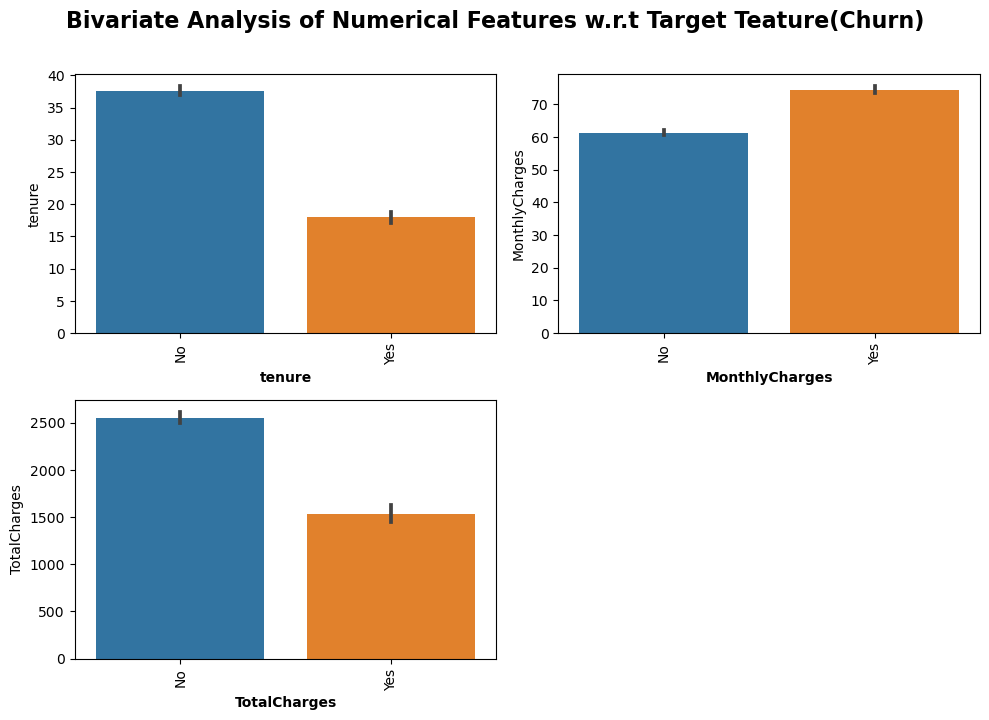

In [180]:
#Bivariate Analysis of Numerical Features w.r.t. Target Teature (churn)

def Bivariate_analysis_Barplot(data):
    
    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Bivariate Analysis of Numerical Features w.r.t Target Teature(Churn)',fontsize =16, fontweight = 'bold', alpha =1,y =1.01)    
    i=0
    for col in data:
        if data[col].dtype != 'object' and col not in ['Churn','SeniorCitizen']:
            plt.subplot(2,2,i+1)
            sns.barplot(y=df[col],x=df['Churn'])
            plt.tight_layout()
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.xticks(rotation='vertical')
            i=i+1
            
Bivariate_analysis_Barplot(df)
#Average churn rate of Senior citizen are more.
#Average tenure for the client to churn out was more.
#Average monthly charges paid by churned customer are more.
#Average Total Charges paid by Non churned cutomer are more as the tenure for non churned customer are more.


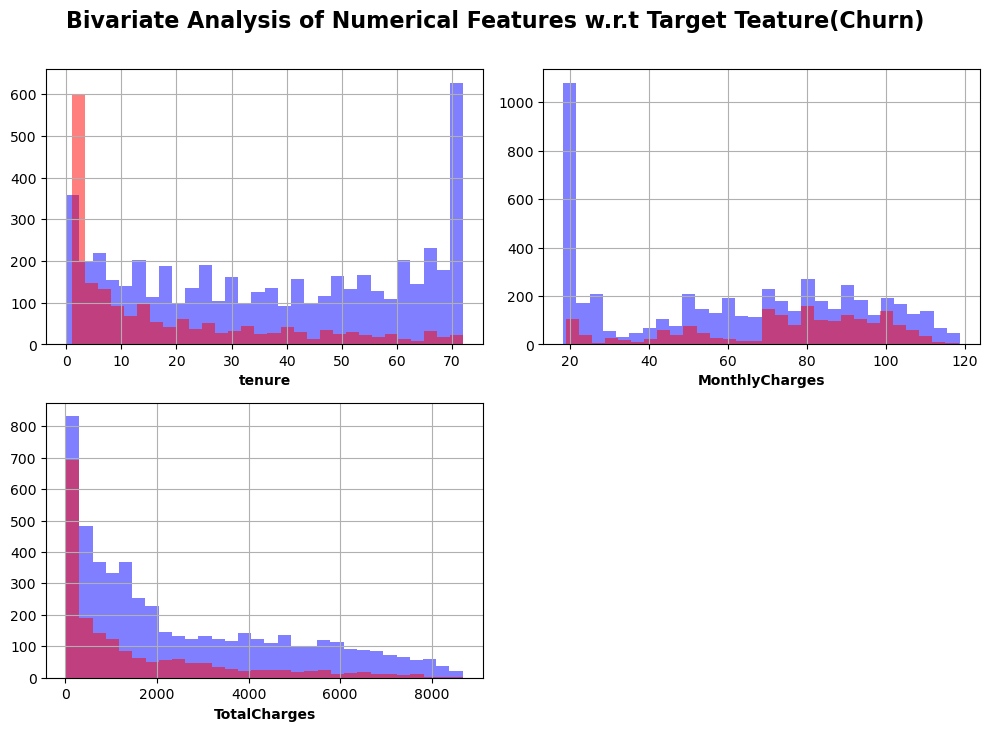

In [181]:
#Bivariate Analysis of Numerical Features w.r.t. Target Teature (churn)

numerical_feature = ['tenure','MonthlyCharges','TotalCharges']

def Bivariate_analysis_Histplot(data):

    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Bivariate Analysis of Numerical Features w.r.t Target Teature(Churn)',fontsize =16, fontweight = 'bold', alpha =1,y =1.01)    
    i=0
    
    for col in numerical_feature:
        plt.subplot(2,2,i+1)
        data[data['Churn'] == 'No'][col].hist(bins=30,color='blue',alpha=0.5)
        data[data['Churn'] == 'Yes'][col].hist(bins=30,color='red',alpha=0.5)
        plt.tight_layout()
        plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
        i=i+1
        
Bivariate_analysis_Histplot(df)

#Graph implies the trend of churned and non churned count with repected to numerical feature
##With increase in tenure the count of churned customer was less which implies churned customer have not stayed for long time.
##When Monthly charge was between 70 to 100, the no of churned customer was more
##More churned customer has paid very less charges before quiting the telecom service.


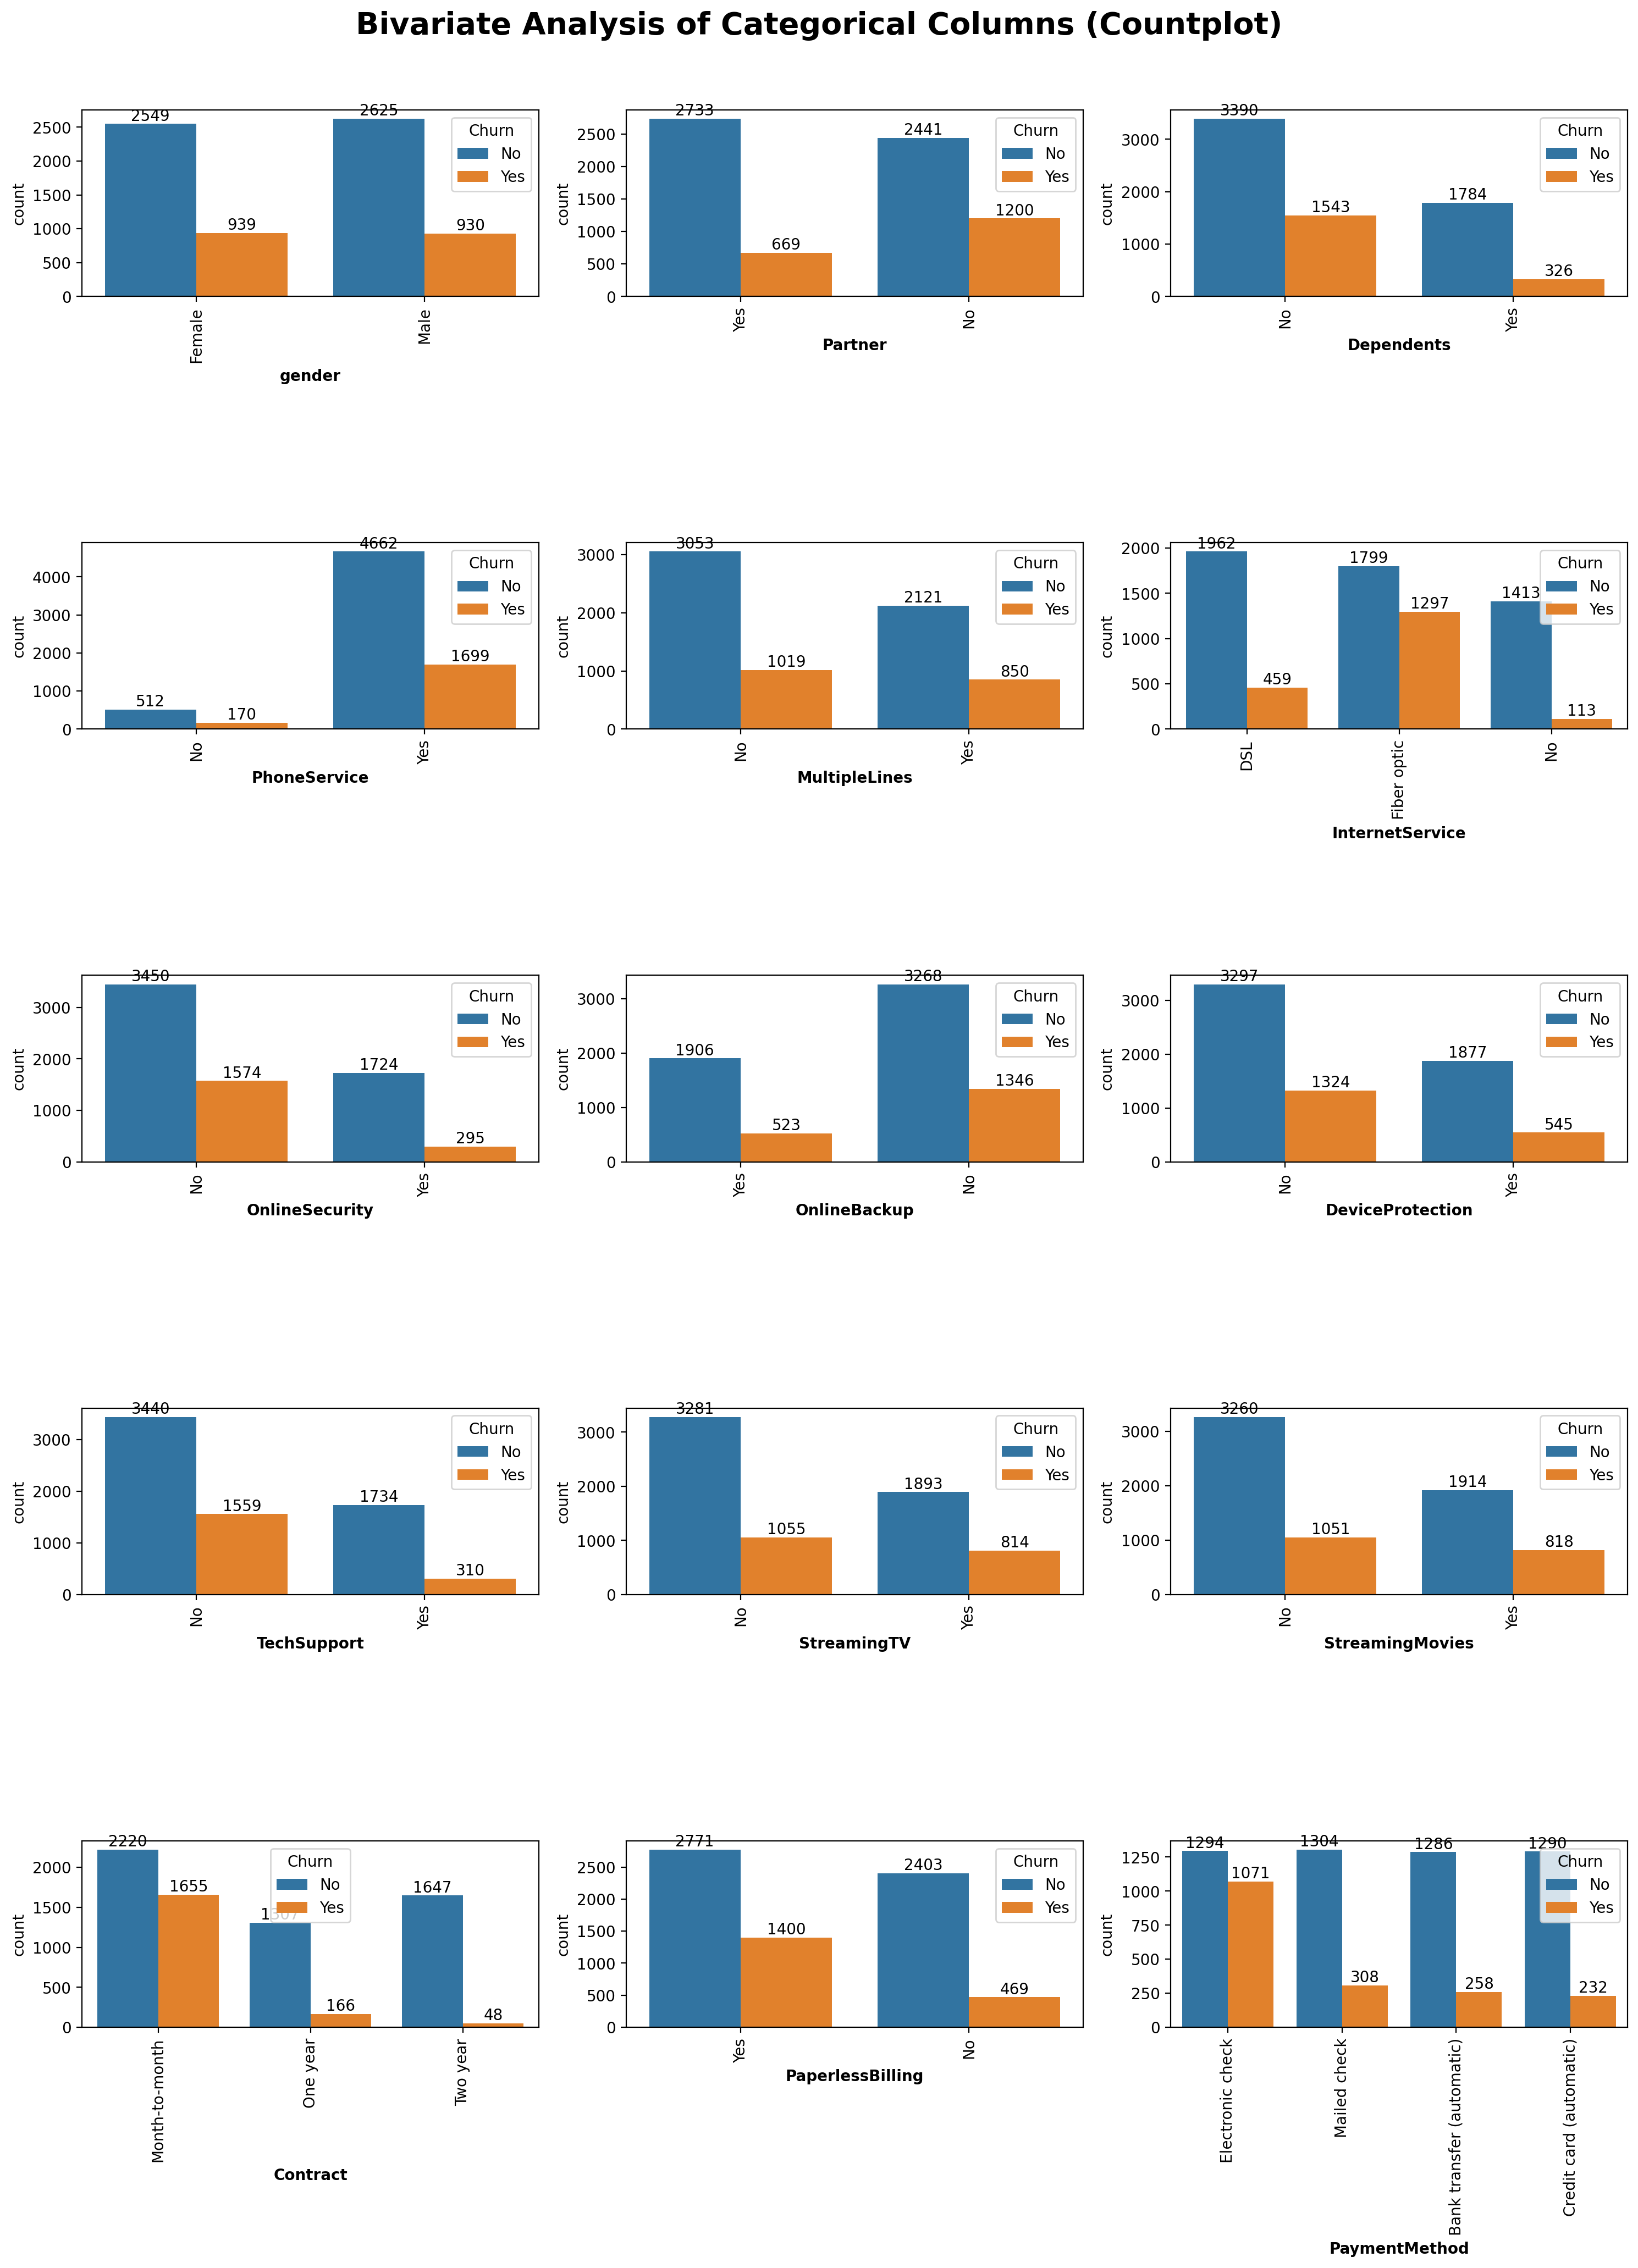

In [182]:
#Bivariate Analysis of Categorical Features w.r.t. Target Teature (churn)

def Bivariate_plots_categorical(data):
    plt.figure(figsize=(15,30),dpi=200)
    plt.suptitle('Bivariate Analysis of Categorical Columns (Countplot)',fontsize=20,fontweight='bold',alpha=1,y=1.01)
    
    i=0
    for col in data:
        if data[col].dtype == 'object' and col not in ['TotalCharges','Churn']:
            plt.subplot(8,3,i+1)
            ax =sns.countplot(data[col],hue=data.Churn)
            plt.xticks(rotation='vertical')
            plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
            for p in ax.containers:
                ax.bar_label(p,padding=0)
                

Bivariate_plots_categorical(df)

#Female has churned more compared to male.
#Partner connection has churned less.
#Dependents connection has churned more.Reason may be that they were not able to get money from their dependent source to sustain.
#Customer having Phone Service connection has churned more.
#MultipleLine connection has churned less 
#People with Fibre Optic has churned more.
#People with no online security, online backup, Device protection,Techsupport,StreamingTV/Movies option and has churned more.
#Month-to-month suscripted customer has churned more.


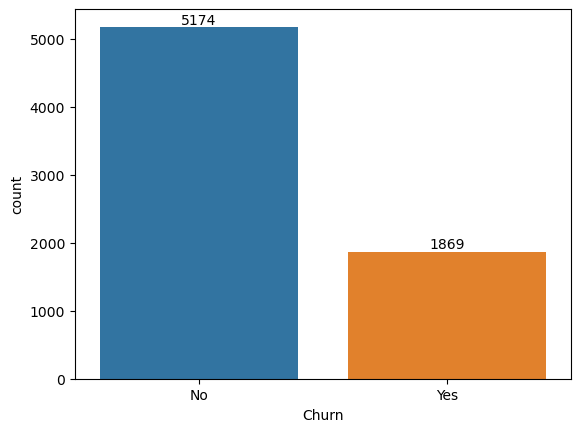

In [183]:
#Check for target column
ax =sns.countplot(df['Churn'])

for p in ax.containers:
    ax.bar_label(p,padding=0)
#Churn yes implies customer who stopped buying product.Since the churned customer are very less which imply the data is highly imbalanced.
#The imbalance can be balanced to some extend by using following method:
#1. Reshuffle the data.
#2. Collect more Data.
#3.Use precision and recall as accuracy metrices.

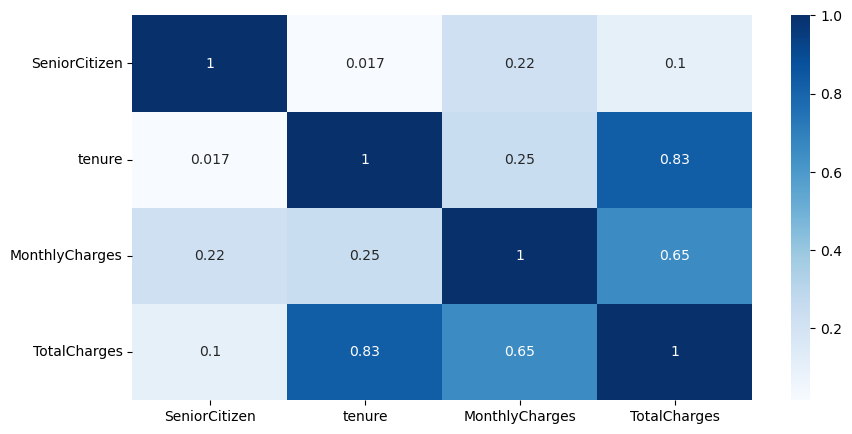

In [184]:
#Heat map for correlation matrix of the dataset
plt.figure(figsize=(10, 5),dpi = 100)
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

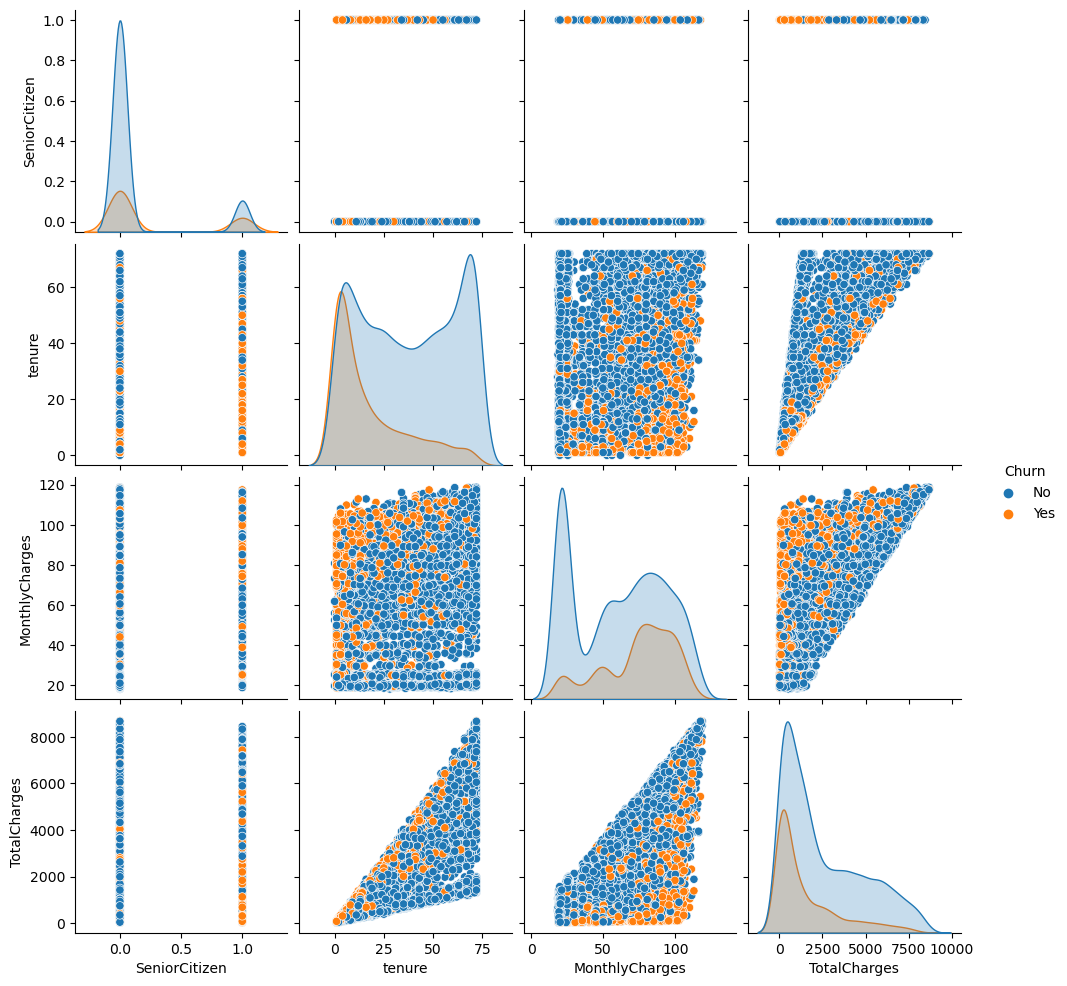

In [185]:
#Plotting pairplot
sns.pairplot(df,hue='Churn')
plt.show()

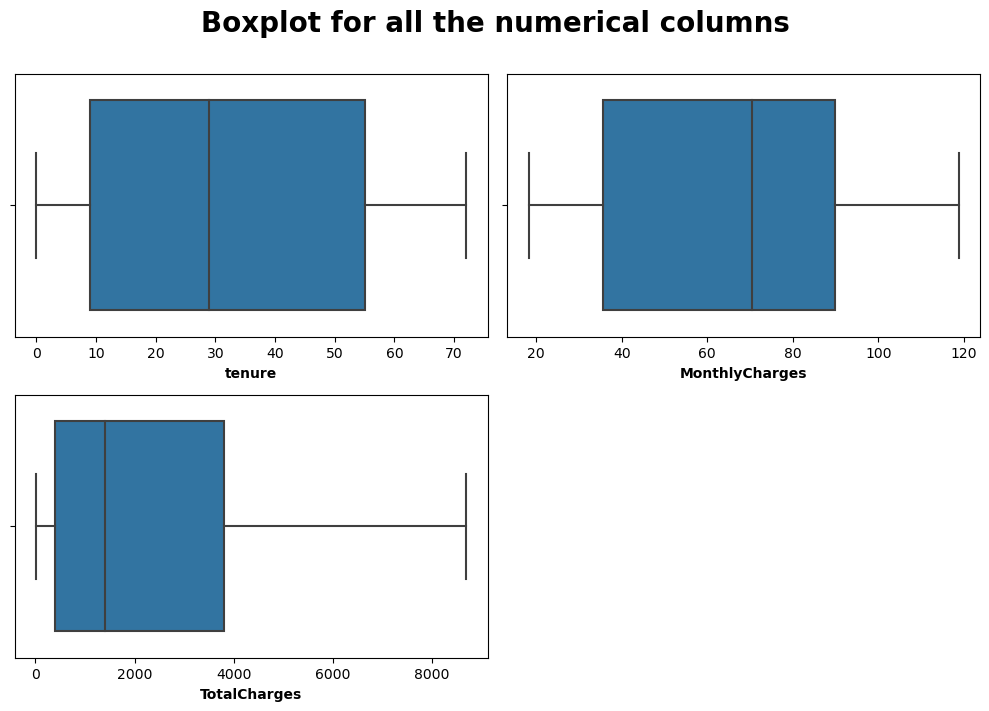

In [186]:
#Check for outlier in the numerical columns via boxplot:

numerical_feature = ['tenure','MonthlyCharges','TotalCharges']

def boxplot(data):
    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Boxplot for all the numerical columns',fontsize=20,fontweight='bold',alpha =1,y =1.01)
    
    i=0
    for col in numerical_feature: 
        plt.subplot(2,2,i+1)
        sns.boxplot(col,data=data)
        plt.tight_layout()
        plt.xlabel(col,fontdict={'fontsize':10,'fontweight':'bold'})
        i=i+1
            
boxplot(df)
#No outlier present in the numerical columns


In [221]:
#based upon above graph insights, lets see the various parameter linked with churning in term of numerical values.

#make a copy of dataframe for analysis.
df1 = df.copy()

#label encoding the churn column feature
churn_numeric = {'Yes':1, 'No':0}
df1.Churn.replace(churn_numeric, inplace=True)

#Churn percent w.r.t gender
df1[['gender','Churn']].groupby(['gender']).mean()*100


,Churn
gender,
Female,26.920872
Male,26.160338


In [223]:
#Churn percent w.r.t Senior citizen
df1[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()*100

,Churn
SeniorCitizen,
0,23.606168
1,41.681261


In [225]:
#Churn percent w.r.t Dependents
df1[['Dependents','Churn']].groupby(['Dependents']).mean()*100

,Churn
Dependents,
No,31.279140
Yes,15.450237


In [224]:
#Churn percent w.r.t Partner
df1[['Partner','Churn']].groupby(['Partner']).mean()*100

,Churn
Partner,
No,32.957979
Yes,19.664903


In [226]:
#Churn percent w.r.t Phone Service
df1[['PhoneService','Churn']].groupby(['PhoneService']).mean()*100

,Churn
PhoneService,
No,24.926686
Yes,26.709637


In [187]:
#Check for outlier using IQR method(IQR method used as the data is not normally distributed)

numerical_feature = ['tenure','MonthlyCharges','TotalCharges']

def count_outlier(data,col):
    q1 = data[col].quantile(0.25,interpolation = 'nearest')
    q2 = data[col].quantile(0.5,interpolation = 'nearest')
    q3 = data[col].quantile(0.75,interpolation = 'nearest')
    q4 = data[col].quantile(1,interpolation = 'nearest')
    
    IQR = q3 -q1
    global LLP
    global ULP
    
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR
    
    if data[col].min() > LLP and data[col].max() < ULP:
        print('No oulier in', i)
    else:
        print('There are outlier in', i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('Count of Outlier are :', x+y)
        
global a
a = []
for i in numerical_feature:
    count_outlier(df,i)

#no oultlier in the numerical columns

No oulier in tenure
No oulier in MonthlyCharges
No oulier in TotalCharges


# Feature engineering

In [188]:
#Dividing the input and output feature of dataframe
x = df.drop(columns=['Churn']) 
y = df.Churn

print('The shape of x (Input Feature) :',x.shape)
print('The shape of y (Output Feature) :',y.shape)

The shape of x (Input Feature) : (7043, 19)
The shape of y (Output Feature) : (7043,)


In [189]:
#train test split for training the model

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=44)

print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)

#training ctegorical columns
train_cat_cols = x_train.select_dtypes(include = 'object').columns
print('Categorical Columns in training dataset:',train_cat_cols)
print('='*125)

#training numerical columns
train_num_cols = x_train.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in training dataset:',train_num_cols)

Shape of x_train: (4930, 19)
Shape of x_test: (2113, 19)
Categorical Columns in training dataset: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Columns in training dataset: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [190]:
#create a class to make custom tranformer for numerical features imputation

class NumericalImputationMICE(BaseEstimator, TransformerMixin): 
    
    def __init__(self,columns):
        self.columns = columns
        return None
    
    def fit(self, X, y = None):
        #the type of X might be a DataFrame or a NumPy array depending on the previous transformer object that you use in the pipeline
        return self
    
    def transform(self, X, y = None):
        """
        Impute numeric data using MICE imputation with Decision Tree Regressor.
        (we can use any other regressors to impute the data)
        """
        impute_numeric = IterativeImputer(estimator = DecisionTreeRegressor(),max_iter = 3,initial_strategy = "mean")
        imputed_data = impute_numeric.fit_transform(X[self.columns])
        X[self.columns] =  imputed_data.astype(int)

        return X

In [191]:
#performing encoding on categorical column - OHE 

encoding_param = [('OHE',OneHotEncoder(sparse=False,drop='first'),train_cat_cols)]

trf_OHE = ColumnTransformer(transformers=encoding_param,remainder='passthrough')

In [192]:
#feature scaling of all the feature of extracted data
scaling_param = [('scale',StandardScaler(),slice(0,23))]

trf_scale = ColumnTransformer(transformers=scaling_param)

In [193]:
#define the steps of pipeline for above column transformers

pipe_steps = [
    ('numerical_imputer',NumericalImputationMICE(columns=train_num_cols)),
    ('trf_OHE',trf_OHE),
    ('trf_scale',trf_scale)    
]

#create a object of pipeline
pipe = Pipeline(steps=pipe_steps)


#display pipline
set_config(display='diagram')

pipe

Pipeline(steps=[('numerical_imputer',
                 NumericalImputationMICE(columns=Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))),
                ('trf_OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('trf_scale',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 23, None))]))])

In [194]:
#stepwise implementation on x_train
x_train_copy = x_train.copy()

In [195]:
#apply numerical imputer 
numerical_imputer_object = pipe['numerical_imputer'].fit_transform(x_train_copy)
#numerical_imputer_object.isnull().sum()
numerical_imputer_object.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2115,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118,8477
1590,Female,0,Yes,Yes,63,Yes,No,No,No,No,No,No,No,No,Two year,No,Electronic check,19,1263
4345,Male,0,Yes,Yes,69,Yes,No,No,No,No,No,No,No,No,One year,Yes,Credit card (automatic),20,1403
234,Female,0,No,No,29,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Electronic check,25,702
5498,Female,1,Yes,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,46,46


In [196]:
#apply Onehotencoding 
encoding = pipe['trf_OHE'].fit_transform(numerical_imputer_object)
#pd.DataFrame(encoding)
encoding

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 7.100e+01, 1.180e+02,
        8.477e+03],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 6.300e+01, 1.900e+01,
        1.263e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 6.900e+01, 2.000e+01,
        1.403e+03],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 6.200e+01, 1.060e+02,
        6.703e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 4.400e+01, 7.000e+01,
        3.250e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+01,
        2.000e+01]])

In [197]:
#applying scaling 
scaling = pipe['trf_scale'].fit_transform(encoding)
#pd.DataFrame(scaling )
scaling

array([[-0.99474   , -0.96178443, -0.65212531, ...,  1.59133476,
         1.78806525,  2.75136507],
       [-0.99474   ,  1.03973403,  1.53344762, ...,  1.26539703,
        -1.5181088 , -0.44069088],
       [ 1.00528781,  1.03973403,  1.53344762, ...,  1.50985032,
        -1.4847131 , -0.37874357],
       ...,
       [-0.99474   ,  1.03973403,  1.53344762, ...,  1.22465481,
         1.38731688,  1.96640426],
       [ 1.00528781,  1.03973403, -0.65212531, ...,  0.49129493,
         0.18507178,  0.43851832],
       [ 1.00528781, -0.96178443, -0.65212531, ..., -1.26062036,
        -1.4847131 , -0.99069442]])

In [198]:
#running all the steps in pipeline altogether
x_train_trf = pipe.fit_transform(x_train)

#labelencoding the output feature
LE = LabelEncoder()
y_train_trf = LE.fit_transform(y_train)

pd.DataFrame(x_train_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.994740,-0.961784,-0.652125,0.321562,1.172989,1.121766,-0.523671,1.585528,1.380884,1.387112,...,-0.518636,1.800746,0.826540,-0.529955,1.412494,-0.547193,-0.446342,1.591335,1.788065,2.751365
1,-0.994740,1.039734,1.533448,0.321562,-0.852523,-0.891451,1.909597,-0.630705,-0.724174,-0.720922,...,-0.518636,1.800746,-1.209863,-0.529955,1.412494,-0.547193,-0.446342,1.265397,-1.518109,-0.440691
2,1.005288,1.039734,1.533448,0.321562,-0.852523,-0.891451,1.909597,-0.630705,-0.724174,-0.720922,...,1.928135,-0.555326,0.826540,1.886953,-0.707968,-0.547193,-0.446342,1.509850,-1.484713,-0.378744
3,-0.994740,-0.961784,-0.652125,0.321562,1.172989,-0.891451,1.909597,-0.630705,-0.724174,-0.720922,...,-0.518636,-0.555326,-1.209863,-0.529955,1.412494,-0.547193,-0.446342,-0.119838,-1.317735,-0.688923
4,-0.994740,1.039734,-0.652125,0.321562,-0.852523,-0.891451,-0.523671,-0.630705,-0.724174,-0.720922,...,-0.518636,-0.555326,-1.209863,-0.529955,1.412494,-0.547193,2.240432,-1.260620,-0.616425,-0.979190


In [199]:
#runnig all the steps in pipeline altogether 
x_test_trf = pipe.transform(x_test)
y_test_trf = LE.transform(y_test)

#create dataframe of transformed X_train
pd.DataFrame(x_test_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.994740,1.039734,1.533448,0.321562,-0.852523,-0.891451,-0.523671,1.585528,1.380884,-0.720922,...,-0.518636,-0.555326,-1.209863,-0.529955,1.412494,-0.547193,-0.446342,0.246842,-0.349259,-0.080954
1,-0.994740,1.039734,1.533448,0.321562,1.172989,1.121766,-0.523671,-0.630705,1.380884,1.387112,...,1.928135,-0.555326,0.826540,-0.529955,1.412494,-0.547193,-0.446342,1.306139,0.919777,1.646491
2,-0.994740,-0.961784,-0.652125,0.321562,-0.852523,-0.891451,1.909597,-0.630705,-0.724174,-0.720922,...,-0.518636,-0.555326,0.826540,-0.529955,1.412494,-0.547193,-0.446342,-0.934683,-1.518109,-0.920782
3,-0.994740,1.039734,-0.652125,0.321562,1.172989,-0.891451,-0.523671,1.585528,-0.724174,1.387112,...,-0.518636,1.800746,-1.209863,1.886953,-0.707968,-0.547193,-0.446342,1.550593,0.018093,1.106222
4,1.005288,-0.961784,1.533448,0.321562,-0.852523,-0.891451,1.909597,-0.630705,-0.724174,-0.720922,...,-0.518636,1.800746,-1.209863,-0.529955,-0.707968,-0.547193,-0.446342,-0.812456,-1.518109,-0.905738


# Model Implementation 

In [200]:
models = {'Logistic Regression':LogisticRegression(),
          'SVM Classifier': SVC(),
          'KNN Classifier' : KNeighborsClassifier(),
          'DecisionTreeClassifier' : DecisionTreeClassifier(),
          'RandomForestClassifier' : RandomForestClassifier(),
          'XGBClassifier' : XGBClassifier()}


In [201]:
for model in models.values():
    print(model)

LogisticRegression()
SVC()
KNeighborsClassifier()
DecisionTreeClassifier()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [202]:
#creating a function to compare model metrices performance

def compare_models(models:dict):
    
    metrics = {'Models':models.keys(),'accuracy_test':[],'precision_test':[],'recall_test':[],'f1_score_test':[]}
    
    for model in models.values():
        #create object of looped model
        model_object = model
        
        #fit the model
        model_object.fit(x_train_trf,y_train_trf)
        
        #prediction of test
        y_pred = model_object.predict(x_test_trf)
        
        #calculate accuracy on test dataset
        accuracy_test = accuracy_score(y_test_trf,y_pred)
        
        #calculate precision on test dataset
        precision_test = precision_score(y_test_trf,y_pred,average='macro')
        
        #calculate recall on test dataset
        recall_test = recall_score(y_test_trf,y_pred,average='macro')
        
        #calculate f1_score on test dataset
        f1_score_test = f1_score(y_test_trf,y_pred,average='macro')
        
        #appending the list in the metrices dict to compare the result of models
        ##appending accuracy_score
        metrics['accuracy_test'].append(accuracy_test)
        
        ##appending precision_score
        metrics['precision_test'].append(precision_test)
        
        ##appending recall_score
        metrics['recall_test'].append(recall_test)
        
        ##appending f1_score
        metrics['f1_score_test'].append(f1_score_test)
        
        
    #create a Dataframe of the resulted metrics of different models
    model_metrices = pd.DataFrame(metrics)
    
    return model_metrices



In [203]:
#comparing classification models metrices 
models_without_tuning = compare_models(models)
models_without_tuning
#Since both logistic regression and SVM Classifier model are performing good, we will check the confusion matrix and classification matrix  

,Models,accuracy_test,precision_test,recall_test,f1_score_test
0,Logistic Regression,0.799811,0.744183,0.712108,0.724642
1,SVM Classifier,0.802177,0.753466,0.697526,0.715777
2,KNN Classifier,0.744439,0.666119,0.656035,0.660428
3,DecisionTreeClassifier,0.727875,0.650655,0.652890,0.651732
4,RandomForestClassifier,0.786559,0.727108,0.679413,0.694935
5,XGBClassifier,0.781827,0.717730,0.685452,0.697422


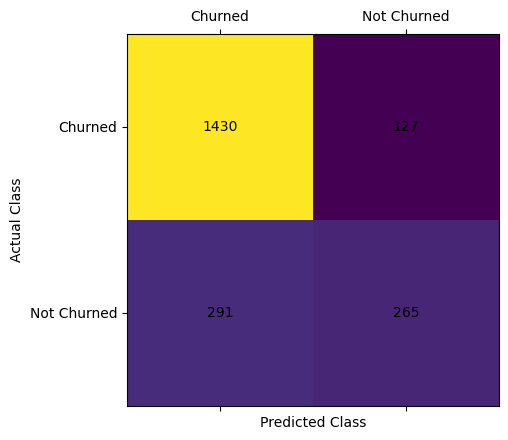

In [204]:
#check for confusion matrix using matshow for SVM

#fit SVC model 
SVM = SVC()
SVM.fit(x_train_trf,y_train_trf)
#predicing values with trained model
y_pred = SVM.predict(x_test_trf)

#creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test_trf,y_pred)
plt.matshow(ConfusionMatrix)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j,i,ConfusionMatrix[i,j],ha='center', va='center')
        
#add custom labels for x and y ticks
plt.xticks([0,1], ['Churned', 'Not Churned'])
plt.yticks([0,1], ['Churned', 'Not Churned'])
plt.show()        

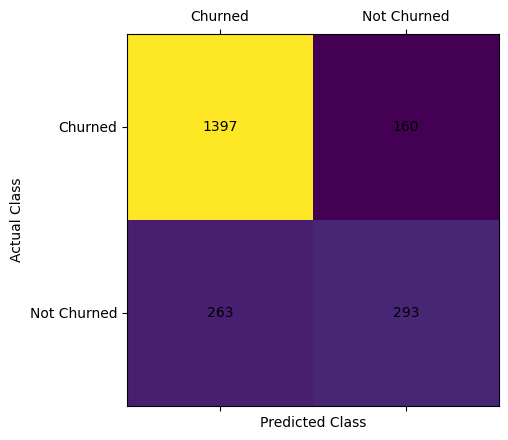

In [205]:
#check for confusion matrix using matshow for Logistic Regression

#fit logistic regression model 
LR = LogisticRegression()
LR.fit(x_train_trf,y_train_trf)
#predicing values with trained model
y_pred = LR.predict(x_test_trf)

#creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test_trf,y_pred)
plt.matshow(ConfusionMatrix)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j,i,ConfusionMatrix[i,j],ha='center', va='center')
        
#add custom labels for x and y ticks
plt.xticks([0,1], ['Churned', 'Not Churned'])
plt.yticks([0,1], ['Churned', 'Not Churned'])
plt.show()        

#since our ultimate motive is to correctly find the churned customer so False negative comes to utmost importance.
#It should be as minimum as possible.So i will select Logistic regression model asthe final model for deployment. 

# Model implemenation with hyper parameter tunning

In [206]:
#Selecting parameter for hyperparameter tunning

model_hyperparameters = {'log_reg_hyperparamters':{'penalty':['l1','l2','elasticnet']},
                         'SVC_hyperparameter':{'kernel':['sigmoid','rbf','linear'],'gamma':[0.5,1.0]},
                         'kNN_clf_hyperparamters':{'n_neighbors':[1,3,5,10,15,20]},
                         
                         'decision_tree_hyperparameters':{'criterion':['gini', 'entropy', 'log_loss'],
                                                          'splitter':['best','random'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.08]},
                         
                         'random_forest_hyperparameters':{'n_estimators':[30,50,60,80,100],
                                                          'criterion':['gini', 'entropy', 'log_loss'],
                                                          'ccp_alpha': [0.03,0.05,0.06,0.09]},
                         
                         'xgb_hyperparameters':{'n_estimators':[30,50,60,70,90],
                                                'gamma':[0.3,0.5,0.6,0.7,0.8],
                                                'learning_rate': [0.05,0.1,0.15,0.2,0.25]}}

In [207]:
models

{'Logistic Regression': LogisticRegression(),
 'SVM Classifier': SVC(),
 'KNN Classifier': KNeighborsClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)

In [208]:
model_keys_list = list(model_hyperparameters.keys())
model_keys_list[0]
model_hyperparameters[model_keys_list[0]]

{'penalty': ['l1', 'l2', 'elasticnet']}

In [209]:
#create function for computing the model with hyperparameter tunning

def modelselection(list_of_models,hyperparameter_dict):
    result=[]
    i=0
    
    for model in list_of_models.values():
        
        #select the keys
        keys= model_keys_list[i]
        
        #get the hyperparameter to get tuned w.r.t keys
        params = hyperparameter_dict[keys]
        
        #create a object of gridsearchcv
        gridsearch = GridSearchCV(estimator=model, param_grid=params , cv =5,n_jobs=-1,scoring='r2')
        gridsearch.fit(x_train_trf,y_train_trf)
        
        result.append({'Model used':model, 'Best_params':gridsearch.best_params_ })
        i=i+1
        
    return result
        
        

In [210]:
best_hyperparameters = modelselection(list_of_models=models,hyperparameter_dict=model_hyperparameters)

In [211]:
#best parameter list for the all the models used
best_hyperparameters

[{'Model used': LogisticRegression(), 'Best_params': {'penalty': 'l2'}},
 {'Model used': SVC(), 'Best_params': {'gamma': 0.5, 'kernel': 'linear'}},
 {'Model used': KNeighborsClassifier(), 'Best_params': {'n_neighbors': 20}},
 {'Model used': DecisionTreeClassifier(),
  'Best_params': {'ccp_alpha': 0.03,
   'criterion': 'entropy',
   'splitter': 'best'}},
 {'Model used': RandomForestClassifier(),
  'Best_params': {'ccp_alpha': 0.03,
   'criterion': 'entropy',
   'n_estimators': 30}},
 {'Model used': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
 

In [212]:
#models with best hyperparameters
model_parameter_tuned = {'Logistic Regression':LogisticRegression(penalty='l2'),
          'SVM Classifier': SVC(gamma=0.5,kernel='linear'),
          'KNN Classifier' : KNeighborsClassifier(n_neighbors=20),
          'DecisionTreeClassifier' : DecisionTreeClassifier(ccp_alpha=0.03,criterion='entropy',splitter='best'),
          'RandomForestClassifier' : RandomForestClassifier(ccp_alpha=0.03,criterion='entropy',n_estimators= 50),
          'XGBClassifier' : XGBClassifier(gamma=0.6,learning_rate=0.05,n_estimators=50)}

models_with_tuning = compare_models(model_parameter_tuned)


In [213]:
#
models_with_tuning

,Models,accuracy_test,precision_test,recall_test,f1_score_test
0,Logistic Regression,0.799811,0.744183,0.712108,0.724642
1,SVM Classifier,0.805490,0.753385,0.716540,0.730613
2,KNN Classifier,0.776148,0.709074,0.685645,0.694980
3,DecisionTreeClassifier,0.736867,0.368434,0.500000,0.424251
4,RandomForestClassifier,0.736867,0.368434,0.500000,0.424251
5,XGBClassifier,0.797444,0.742906,0.699518,0.714892


# Flow for Prediction 

In [214]:
#Fit the model 
LR = LogisticRegression()
LR.fit(x_train_trf,y_train_trf)

#predicting based on input - whether customer will churn or not
x_input = pd.DataFrame(np.array(x_train.iloc[1,:]).reshape(1,19),columns=x_train.columns)


#pipeline transformation of X_input
x_input_trf = pipe.transform(x_input)

##best model used to predict

y_pred_input = LR.predict(x_input_trf)

if y_pred_input == 0:
    print("The customer will not churn out")
else:
    print("The customer will churn out")


The customer will not churn out


# SUMMARY OF PROJECT

 **The summary of the steps executed in ML model are:**

**1. Data collection and overview of the dataframe:**
- The data was extracted from csv file downloaded from kaggle.
- Data consist of 7043 rows and 21 columns.
- Intuition of the data was gained via calling the first five and last five rows.
- There were 0.15% Nan values present in TotalCharges feature of given dataset.
- There were no duplicated value present in the given dataset.
- Datatype of TotalCharges changed to float from string.
- Feature customerID was dropped out since its non informative and there is no particular trend in the customerID feature which may help in model building or prediction.
- Function was created to get value_counts corresponding to unique categories. In many feature categories was present having same meaning. The same featue categories was reduced.

**2. Exploratory Data Analysis:**
- Univariate Analysis:
    - Dist and QQ plot was ploted for numerical columns which depicted none of the numerical columns are normally distributed.
    - Countplot of categorical features was plotted which provide following insights:
        - There are more male having telecom connection compared to female.
        - Most people have opt fibre optic as internet service.
        - Maximum people have not opt Multipleline, OnlineSecurity, device protection and StreamingTV services.
        - Maximum people have month to month connection.
        - Since the churned customer are very less which imply the data is highly imbalanced.The imbalance nature of data can be balanced to some extend by using following method:
            1. Reshuffle the data.
            2. Collect more Data.
            3.Use precision and recall as accuracy metrices.
            
-  Bivariate and Multivariate Analysis:
    - Histplot was plotted of numerical column with bin size of 50 against the targeted feature.Following insights were gained from the plotted histplot:
        - With increase in tenure the count of churned customer was less which implies churned customer have not stayed for long time.
        - When Monthly charge was between 70 to 100, the no of churned customer was more
        - More churned customer has paid very less charges before quiting the telecom service.
    - Countplot was plotted for the categorical feature with respect to target feature (Churn). FOllowing insights were gained from the plotted countplots:
        - Female has churned more compared to male.
        - Partner connection has churned less.
        - Dependents connection has churned more.Reason may be that they were not able to get money from their dependent source to sustain.
        - Customer having Phone Service connection has churned more.
        - MultipleLine connection has churned less 
        - People with Fibre Optic has churned more.
        - People with no online security, online backup, Device protection,Techsupport,StreamingTV/Movies option and has churned more.
        - Month-to-month suscribed customer has churned more.
    - Heat map for correlation matrix of the dataset was viewed. Following insights were gained:
        - Tenure and TotalCharges was having strong correlation.
        - Monthly charges and TotalCharges was having strong correlation. (as the case should be)
    - Pairplot was plotted for numerical feature with respect to target feature (Churn).
    - Box plot was plotted for checking the outlier present in the numerical features.Since the data was non uniform, IQR method was used to check for the outlier present in the numerical columns of the given dataset.(Function for checking programmatically outlier in dataset was also created. The resultant of boxplot and function was that there were no outlier present in the given dataset.
    
**3. Feature Engineering:**
    Pipeline was created for all the feature engineering works for the dataframe for ease of deployment of model.Step of same is as follow:
- **Step1 Missing Value Imputation**: The missing value in the TotalCharges was imputed with Iterative imputation method by creating a function named NumericalImputationMICE. 
- **Step2 Encoding of categorical columns**: Columntransformer object was created for Onehotencoding of 'gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling' and 'PaymentMethod'.   
- **Step3 Scaling**: Scaling of all the columns after encoding was done in order to get efficient end result of the final model.
    
**5. Model Building:**

- Train test split was performed with test_size as 20% and random state of 0.2.
- Further **Five** classification model was fitted for the splitted data set and various accuracy_score/precision score/recall_score/f1_score was fetched.

**Since the data was highly imbalanced classification and confusion matrix was created for best performing model.**

**Name of model used are below:**
- LogisticRegression.
- SVC.
- KNeighborsClassifier.
- DecisionTreeClassifier.
- RandomForestClassifier.
- XGBClassifier.

Hyperparameter Tunning was performed through gridsearchcv of all the above mentioned model to get the best hyperparameter tunned Machine Learning program. 

**6. Conclusion:**

- **LogisticRegression algorithm** outstanded the performance of model with highes **recall score of ~71%**

**Since our ultimate motive is to correctly find the churned customer so False negative comes to utmost importance.
It should be as minimum as possible.So i selected Logistic regression model as the final model for deployment.**




